# **Financial Risk Classification of S&P 500 Companies Using Machine Learning**

## **Objective**
apply supervised machine learning techniques to classify S&P 500 companies based on financial health indicators such as profit margins, debt levels, and return on equity. We aim to build a predictive model that categorizes companies as low, medium, or high financial risk. This can assist in investment decision-making and financial forecasting.

## **Methodology**
Our approach involves several key steps:
1. Data preprocessing and exploration of variables
2. Feature engineering to create meaningful predictors
3. 
4. 

## **Data Overview**
The dataset including numerous financial metrics that many professionals and investing gurus often use to value companies. This data is a look at the companies that comprise the S&P 500 (Standard & Poor's 500). The S&P 500 is a capitalization-weighted index of the top 500 publicly traded companies in the United States (top 500 meaning the companies with the largest market cap). The S&P 500 index is a useful index to study because it generally reflects the health of the overall U.S. stock market. The dataset was last updated in July 2020.
* Size: ~503 companies × ~25 variables
* Features: Includes metrics such as:
* P/E Ratio, Market Cap, Beta, EPS, Profit Margin, Debt/Equity, ROE, etc.
* Format: Clean, structured CSV (filename: financials.csv)

### **Data Source**
[S&P 500 Companies with Financial Information](https://www.kaggle.com/datasets/paytonfisher/sp-500-companies-with-financial-information?resource=download)

### 1. Install Dependencies
In this section, we install all required dependencies listed in requirements.txt. These packages are essential for data processing, visualization, and implementing various machine learning algorithms for our wildfire risk prediction model.

In [ ]:
# Install all required dependencies listed in requirements.txt
# %pip install -r requirements.txt

### 2. Setup and Dependencies
Here, we import all necessary Python libraries for:
- Data manipulation (pandas, numpy)
- Visualization (matplotlib, seaborn)
- Statistical analysis
- Machine learning models (scikit-learn, PyTorch)

In [1]:
# Standard Library
import math
import os
import warnings

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics & Diagnostics
import scipy.stats as stats

# Machine Learning: Preprocessing, Metrics, Utilities
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    mean_absolute_error, mean_squared_error, r2_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, precision_recall_curve
)
from sklearn.utils import shuffle

# Machine Learning: Models
# Linear Models
from sklearn.linear_model import LinearRegression, LogisticRegression
# Tree-based Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier,
    BaggingClassifier, AdaBoostClassifier
)
# Other Models
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import mutual_info_classif

# Deep Learning with PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Configuration
warnings.filterwarnings("ignore")
pd.set_option("display.float_format", "{:.2f}".format)
sns.set_style("whitegrid")

### 3. Load & Inspect Data
This section loads the weather dataset from a CSV file. We then inspect the data structure, looking at the first few rows, data types, and checking for missing values. This step is crucial for understanding the dataset structure and quality before proceeding with analysis.

In [4]:
# Load the dataset
data_file = os.path.join("..", "dataset", "../dataset/financials.csv")
financial_df = pd.read_csv(data_file)

# Display first few rows of the dataset
# display(financial_df.head())
print(financial_df.head()) 

# Display the data types of the columns
print("\nData types:")
print(financial_df.dtypes)

# Check missing values
print("\nMissing values:")
print(financial_df.isnull().sum())

print(financial_df.columns.tolist())

  Symbol                 Name                  Sector  Price  Price/Earnings  \
0    MMM           3M Company             Industrials 222.89           24.31   
1    AOS      A.O. Smith Corp             Industrials  60.24           27.76   
2    ABT  Abbott Laboratories             Health Care  56.27           22.51   
3   ABBV          AbbVie Inc.             Health Care 108.48           19.41   
4    ACN        Accenture plc  Information Technology 150.51           25.47   

   Dividend Yield  Earnings/Share  52 Week Low  52 Week High      Market Cap  \
0            2.33            7.92       259.77        175.49 138721055226.00   
1            1.15            1.70        68.39         48.92  10783419933.00   
2            1.91            0.26        64.60         42.28 102121042306.00   
3            2.50            3.29       125.86         60.05 181386347059.00   
4            1.71            5.44       162.60        114.82  98765855553.00   

          EBITDA  Price/Sales  Price/B

### 4. Clean Column Names & Create Risk Target

In this step, we:
- **Standardize column names** to lowercase with underscores for consistency and ease of use in Python.
- **Engineer a classification target variable (`risk_class`)** to group companies based on their financial health.
  - We use **`earnings/share`** as a proxy for profitability.
  - Companies are split into **Low**, **Medium**, and **High risk** groups using quantiles:
    - **Low Risk**: Top third of companies with highest earnings/share  
    - **Medium Risk**: Middle third  
    - **High Risk**: Bottom third (lowest earnings/share)

This allows us to transform the problem into a **supervised classification task** aligned with our project goal.

In [5]:
financial_df = financial_df.copy()  # safety copy

# Rename columns to lowercase with underscores
financial_df.columns = financial_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('/', '_')

# Sample rule: create a synthetic risk class from earnings/share (customize as needed)
financial_df['risk_class'] = pd.qcut(financial_df['earnings_share'], q=3, labels=['High', 'Medium', 'Low'])  # High risk = low earnings

# Preview
financial_df[['name', 'earnings_share', 'risk_class']].head()


,name,earnings_share,risk_class
0,3M Company,7.92,Low
1,A.O. Smith Corp,1.70,High
2,Abbott Laboratories,0.26,High
3,AbbVie Inc.,3.29,Medium
4,Accenture plc,5.44,Low


### 5. Exploratory Data Analysis (EDA)
Below we explore the distribution, outliers, and relationships between financial metrics and the risk classes.
* Histograms or boxplots of key financial variables
* Correlation heatmap
* Summary statistics
* Target distribution (Low, Medium, High risk classes)

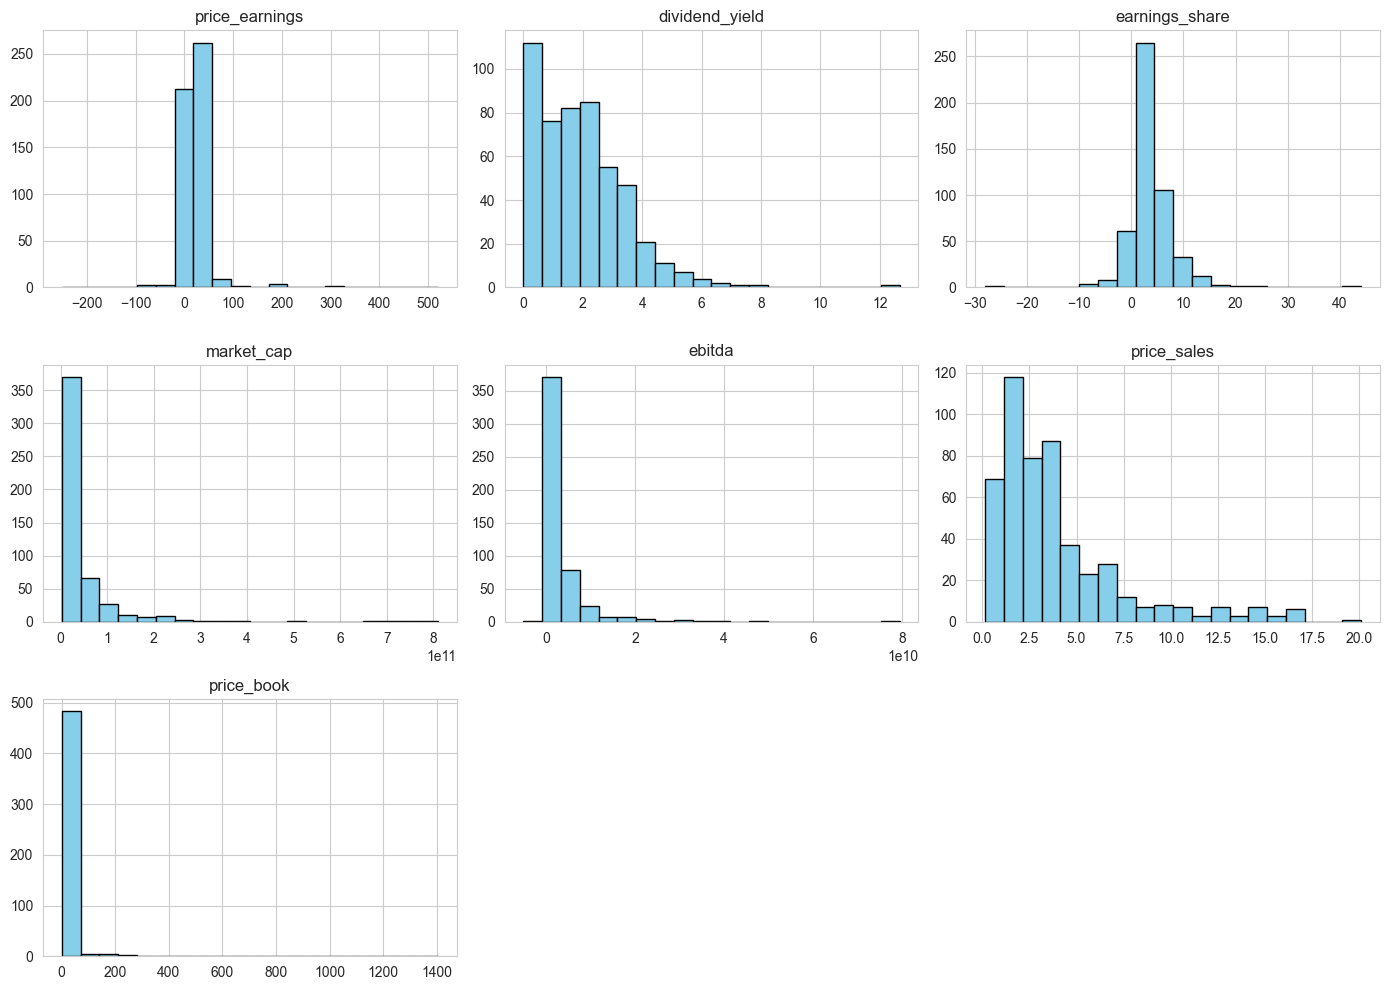

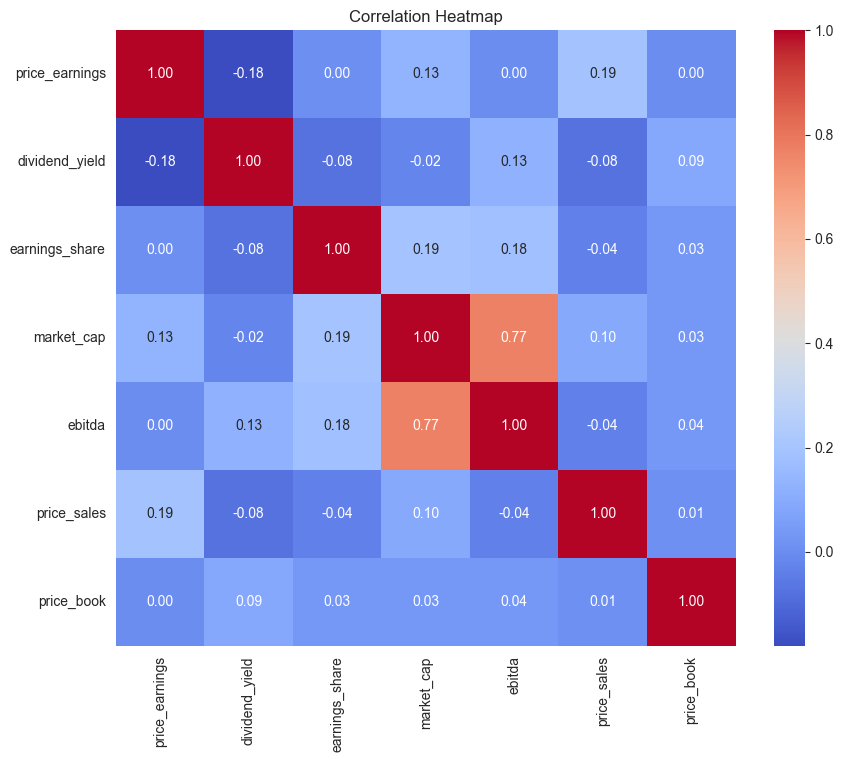

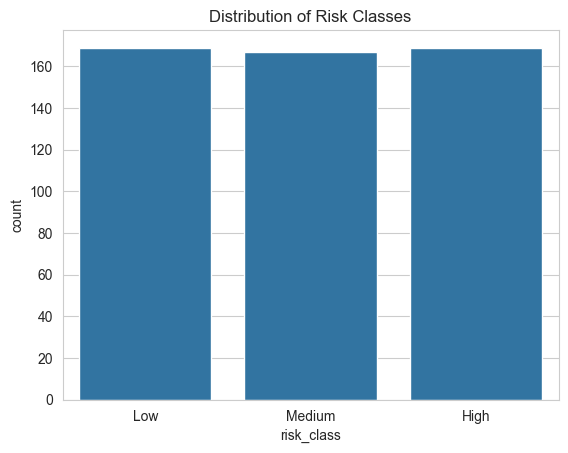

In [6]:
# Numeric columns for visualization
num_cols = ['price_earnings', 'dividend_yield', 'earnings_share', 'market_cap',
            'ebitda', 'price_sales', 'price_book']

# Histograms
financial_df[num_cols].hist(bins=20, figsize=(14, 10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(financial_df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Risk class distribution
sns.countplot(x='risk_class', data=financial_df, order=['Low', 'Medium', 'High'])
plt.title("Distribution of Risk Classes")
plt.show()


### 6. Feature Selection
We use both domain knowledge and statistical methods (e.g., mutual information, feature importance from models) to identify the most relevant predictors.
* Use correlation with target (Risk_Class)
* Apply feature importance from tree models or mutual information scores
* Drop irrelevant or redundant columns

Missing values:
 price_earnings    2
dividend_yield    0
earnings_share    0
market_cap        0
ebitda            0
price_sales       0
price_book        8
dtype: int64


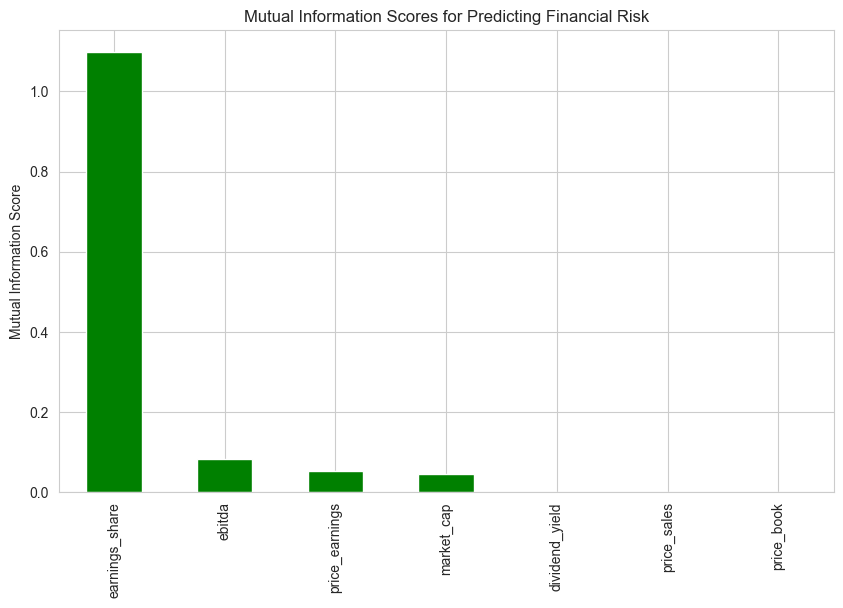

In [9]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Encode target
le = LabelEncoder()
y = le.fit_transform(financial_df['risk_class'])

# Selected features
num_cols = ['price_earnings', 'dividend_yield', 'earnings_share', 'market_cap',
            'ebitda', 'price_sales', 'price_book']
X = financial_df[num_cols]

# Check how many missing values exist in each column
print("Missing values:\n", X.isnull().sum())

# Option 1: Simple imputation (recommended for now)
X = X.fillna(X.median(numeric_only=True))  # replace NaNs with median of each column

# Option 2: Drop rows with missing values
# X = X.dropna()
# y = y[X.index]

# Mutual Information scores
mi_scores = mutual_info_classif(X, y)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
mi_series.plot(kind='bar', color='green')
plt.title("Mutual Information Scores for Predicting Financial Risk")
plt.ylabel("Mutual Information Score")
plt.show()
